#Ensemble Techniques:

#Theory:-

1. Can we use Bagging for regression problems
 - Yes, Bagging can be used for regression by using BaggingRegressor with base regressors like DecisionTreeRegressor.

2. What is the difference between multiple model training and single model training
 - Single model training involves training one algorithm, while multiple model training (ensemble) combines predictions from several models for improved accuracy.

3. Explain the concept of feature randomness in Random Forest
 - In Random Forest, at each split, a random subset of features is selected to determine the best split, promoting diversity.

4. What is OOB (Out-of-Bag) Score
 - It is an internal validation score computed using data not included in the bootstrap sample for each tree.

5. How can you measure the importance of features in a Random Forest model
 - Feature importance is computed by measuring how much each feature decreases impurity (e.g., Gini) across all trees.

6. Explain the working principle of a Bagging Classifier
 - Bagging creates multiple bootstrap datasets, trains a base classifier on each, and combines their predictions via majority voting.

7. How do you evaluate a Bagging Classifier’s performance
 - By computing metrics like accuracy, precision, recall, or AUC on test data or using cross-validation.

8. How does a Bagging Regressor work
 - Similar to Bagging Classifier, but predictions from base regressors are averaged.

9. What is the main advantage of ensemble techniques
 - Improved accuracy and robustness by reducing variance and avoiding overfitting.

10. What is the main challenge of ensemble methods
 - Complexity in model interpretation and increased computational cost.

11. Explain the key idea behind ensemble techniques
 - Combine multiple models to form a stronger overall model.

12. What is a Random Forest Classifier
 - An ensemble of Decision Trees trained via Bagging, with added feature randomness.

13. What are the main types of ensemble techniques
 - Bagging, Boosting, Stacking, Voting.

14. What is ensemble learning in machine learning
 - A technique that combines predictions from multiple models to improve performance.

15. When should we avoid using ensemble methods
 - When interpretability is critical, or if computational resources are limited.

16. How does Bagging help in reducing overfitting
 - By averaging multiple models trained on different data subsets, variance is reduced.

17. Why is Random Forest better than a single Decision Tree
 - It reduces overfitting and increases generalization by aggregating multiple diverse trees.

18. What is the role of bootstrap sampling in Bagging
 - It ensures each model is trained on a different random subset of the data.

19. What are some real-world applications of ensemble techniques
 - Fraud detection, credit scoring, recommendation systems, medical diagnosis.

20. What is the difference between Bagging and Boosting?
 - Bagging trains models independently in parallel; Boosting trains models sequentially to correct errors of prior models.

#Practicals:-

In [8]:
#21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load sample dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimator
base_dt = DecisionTreeClassifier()

# Create Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_dt, n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [14]:
#22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)2
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error


data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, bag_reg.predict(X_test))
print("1. Bagging Regressor MSE:", round(mse, 4))

1. Bagging Regressor MSE: 0.2862


In [15]:
#23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = data.feature_names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False).head())

                 Feature  Importance
23            worst area    0.139357
27  worst concave points    0.132225
7    mean concave points    0.107046
20          worst radius    0.082848
22       worst perimeter    0.080850


In [16]:
#24.Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train models
tree = DecisionTreeRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

# Predictions
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

# Compare MSE
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)

print(f"Decision Tree MSE: {tree_mse:.2f}")
print(f"Random Forest MSE: {forest_mse:.2f}")

Decision Tree MSE: 0.53
Random Forest MSE: 0.26


In [17]:
#25.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X, y)
print(f"OOB Score: {rf_oob.oob_score_:.2f}")

OOB Score: 0.96


In [18]:
#26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Use smaller subset to speed up SVM
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.3, random_state=42)

# Train Bagging with SVM
bag_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.3, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print(f"Bagging SVM Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Bagging SVM Accuracy: 0.92


5 Trees: Accuracy = 0.92
10 Trees: Accuracy = 0.98
50 Trees: Accuracy = 0.96
100 Trees: Accuracy = 0.96
200 Trees: Accuracy = 0.98


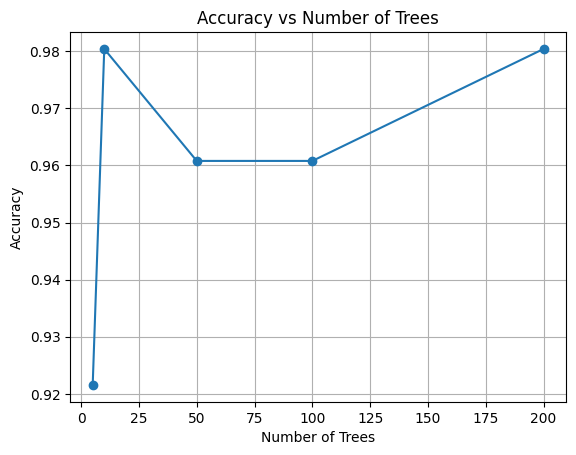

In [19]:
#27.Train a Random Forest Classifier with different numbers of trees and compare accuracy.
import matplotlib.pyplot as plt

accuracies = []
tree_counts = [5, 10, 50, 100, 200]

for n in tree_counts:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)
    print(f"{n} Trees: Accuracy = {acc:.2f}")

# Optional: plot results
plt.plot(tree_counts, accuracies, marker='o')
plt.title("Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [51]:
#28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

# Load the dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a BaggingClassifier using Logistic Regression as base estimator
bagging_clf = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = bagging_clf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_proba)

print("AUC Score:", round(auc, 4))

AUC Score: 0.9982


In [21]:
#29.Train a Random Forest Regressor and analyze feature importance scores.
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
importances = rf_reg.feature_importances_
importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False).head())

                 Feature  Importance
7    mean concave points    0.387641
27  worst concave points    0.229101
22       worst perimeter    0.121435
23            worst area    0.058610
20          worst radius    0.041910


In [22]:
#30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.
# Bagging
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_acc = bag_model.score(X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = rf_model.score(X_test, y_test)

print(f"Bagging Accuracy: {bag_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Bagging Accuracy: 0.96
Random Forest Accuracy: 0.97


In [25]:
#31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
rf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

print("Best Params:", search.best_params_)
print("Best CV Accuracy:", round(search.best_score_, 4))
print("Test Accuracy:", round(search.score(X_test, y_test), 4))

Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.9497
Test Accuracy: 0.9591


In [26]:
#32.Train a Bagging Regressor with different numbers of base estimators and compare performance.
housing = fetch_california_housing()
Xr, yr = housing.data, housing.target
Xtr, Xte, ytr, yte = train_test_split(Xr, yr, test_size=0.3, random_state=42)

for n in [5, 10, 50, 100]:
    bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag.fit(Xtr, ytr)
    mse = mean_squared_error(yte, bag.predict(Xte))
    print(f"{n} estimators → MSE: {round(mse, 4)}")

5 estimators → MSE: 0.3168
10 estimators → MSE: 0.2862
50 estimators → MSE: 0.2579
100 estimators → MSE: 0.2568


In [30]:
#33.Train a Random Forest Classifier and analyze misclassified samples.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer # Import the dataset

# Load data if not already loaded
try:
    X
    y
except NameError:
    data = load_breast_cancer()
    X, y = data.data, data.target
    # Split data if not already split (using the same split from previous cells for consistency)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
mis = np.where(pred != y_test)[0]
print("Misclassified indices:", mis[:10])
print("True vs Pred:", list(zip(y_test[mis[:5]], pred[mis[:5]])))

Misclassified indices: [  8  20  77  82 164]
True vs Pred: [(np.int64(1), np.int64(0)), (np.int64(0), np.int64(1)), (np.int64(0), np.int64(1)), (np.int64(0), np.int64(1)), (np.int64(0), np.int64(1))]


In [31]:
#34.Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
X4, y4 = load_iris(return_X_y=True)
Xt4, Xv4, yt4, yv4 = train_test_split(X4, y4, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42).fit(Xt4, yt4)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42).fit(Xt4, yt4)

print("Decision Tree Accuracy:", round(dt.score(Xv4, yv4), 4))
print("Bagging Classifier Accuracy:", round(bag.score(Xv4, yv4), 4))

Decision Tree Accuracy: 1.0
Bagging Classifier Accuracy: 1.0


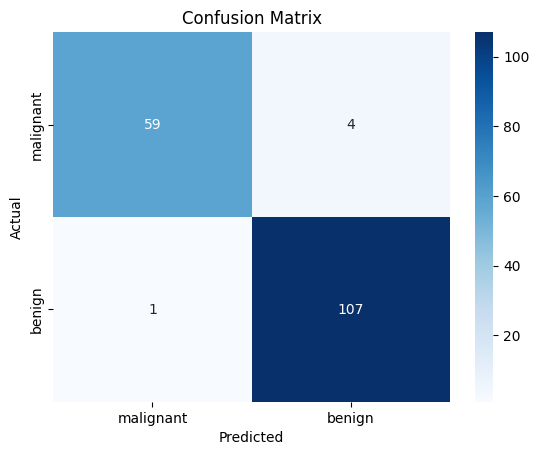

In [34]:
#35.Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
#36.Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.
from sklearn.ensemble import StackingClassifier
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", round(stack.score(X_test, y_test), 4))

Stacking Classifier Accuracy: 0.9708


In [36]:
#37.Train a Random Forest Classifier and print the top 5 most important features.
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)
feat = pd.Series(rf2.feature_importances_, index=data.feature_names).nlargest(5)
print("Top 5 important features:\n", feat)

Top 5 important features:
 mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


In [38]:
#38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagc = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagc.fit(X_train, y_train)
predc = bagc.predict(X_test)
print("Precision:", round(precision_score(y_test, predc), 4))
print("Recall:", round(recall_score(y_test, predc), 4))
print("F1-score:", round(f1_score(y_test, predc), 4))

Precision: 0.9633
Recall: 0.9722
F1-score: 0.9677


In [39]:
#39.Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.
for d in [1, 3, 5, 10, None]:
    m = RandomForestClassifier(n_estimators=50, max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    print("max_depth =", d, "→ accuracy:", round(m.score(X_test, y_test), 4))

max_depth = 1 → accuracy: 0.9532
max_depth = 3 → accuracy: 0.9708
max_depth = 5 → accuracy: 0.9649
max_depth = 10 → accuracy: 0.9708
max_depth = None → accuracy: 0.9708


In [41]:
#40.Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
from sklearn.neighbors import KNeighborsRegressor
Xtr, Xte, ytr, yte = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
for est in (DecisionTreeRegressor(), KNeighborsRegressor()):
    bag = BaggingRegressor(estimator=est, n_estimators=50, random_state=42)
    bag.fit(Xtr, ytr)
    mse = mean_squared_error(yte, bag.predict(Xte))
    print(f"{est.__class__.__name__} base → MSE: {round(mse, 4)}")

DecisionTreeRegressor base → MSE: 0.2579
KNeighborsRegressor base → MSE: 1.1021


In [42]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
prob_rf = rfc.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, prob_rf), 4))

ROC-AUC: 0.9968


In [45]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validatio.
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(bagc, X, y, cv=5, scoring='accuracy')
print("Cross-val accuracies:", np.round(scores, 4))
print("Mean CV accuracy:", round(scores.mean(), 4))

Cross-val accuracies: [0.9123 0.9211 0.9825 0.9561 1.    ]
Mean CV accuracy: 0.9544


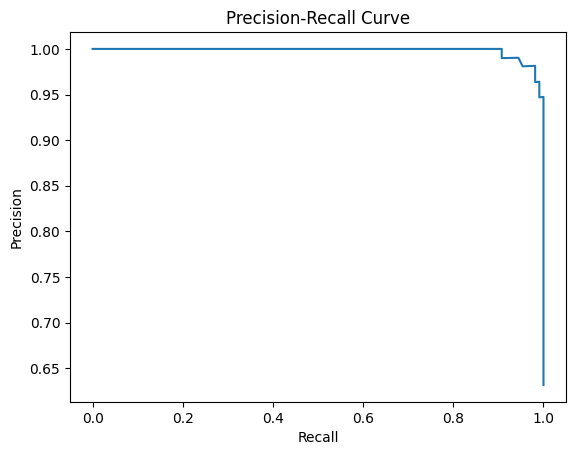

In [47]:
#43.Train a Random Forest Classifier and plot the Precision-Recall curve.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, _ = precision_recall_curve(y_test, prob_rf)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [48]:
#44.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
stack2 = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    final_estimator=LogisticRegression()
)
stack2.fit(X_train, y_train)
print("Stacking RF+LR Accuracy:", round(stack2.score(X_test, y_test), 4))

Stacking RF+LR Accuracy: 0.9708


In [49]:
#45.Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
Xtr, Xte, ytr, yte = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
for bs in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, max_samples=bs, random_state=42)
    bag.fit(Xtr, ytr)
    mse = mean_squared_error(yte, bag.predict(Xte))
    print(f"max_samples={bs} → MSE: {round(mse, 4)}")

max_samples=0.5 → MSE: 0.2633
max_samples=0.7 → MSE: 0.2621
max_samples=1.0 → MSE: 0.2579
